In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter
import uproot
sys.path.append("../")
import saq
import glob
import  csv


Welcome to JupyROOT 6.28/06


In [2]:
#Use the function glob() in the glob libary to obtain a list of paths matching a pathname pattern
root_file_paths = sorted(glob.glob('/home/wwz/saq_analysis/calibration/11_09_2023_complete_calibration/*.root'))
#sorted(root_file_paths)
#print(sorted(root_file_paths))


# Initialize lists to store data for each file
timestamps_list = []
masks_list = []

# Define constants
clock_rate = 30.3e6
nn = 0
cutoff = (2**32) - 1
loop_time = cutoff / clock_rate

real_channel =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# Iterate through each root file
for j, root_file_path in enumerate(root_file_paths):
    # Open the ROOT file
    file = uproot.open(root_file_path)

    # Access the tree from the ROOT file
    tree = file["tt"]  # 'tt' is the name of the data tree in the root file

    # Convert the tree data into a dictionary
    data = tree.arrays(library="np")

    # Get timestamps from the data
    timestamps = data["Timestamp"]
    mask = data["ChMask"]
    pid = data['pid']
    #print(len(timestamps))
    #print(min(pid))
    print(pid[:10], min(pid))

    #print(timestamps[:10])
    #print(mask[:10])
    
    #filtered_timestamps =[]
    #for i in range(len(timestamps)):
        #if mask[i] == 2**(ch-1):
            #filtered_timestamps.append(timestamps[i]
    
    #This line does the same thing as the loop above, but in a more consice and Pythonic way
    filtered_timestamps = [timestamps[i] for i in range(5, len(timestamps)) if mask[i] == 2**(real_channel[j]-1)]
    
    print(len(filtered_timestamps))
    #print(filtered_timestamps[:10])

    # Initialize an array to store time in seconds
    time_sec = np.zeros(len(filtered_timestamps))

    # Convert the individual entries to show the time in seconds
    for i in range(len(filtered_timestamps)):
        time_sec[i] = filtered_timestamps[i] / clock_rate + (nn * loop_time)
        if i > 0 and filtered_timestamps[i] < filtered_timestamps[i - 1]:
            nn += 1
            time_sec[i] = float(filtered_timestamps[i] / clock_rate) + float(nn * loop_time)

    # Store the time_sec array in a list
    timestamps_list.append(time_sec)
    masks_list.append(data["ChMask"])

    nn=0

[0 0 0 0 0 1 1 1 1 1] 0
21863
[7588 7588 7588 7588 7588 7588 7588 7588 7589 7589] 7588
8738
[16069 16069 16069 16069 16069 16070 16070 16070 16070 16070] 16069
15627
[21839 21839 21839 21839 21839 21840 21840 21840 21840 21840] 21839
12334
[35681 35681 35681 35681 35681 35681 35681 35682 35682 35682] 35681
14879
[45500 45500 45500 45500 45500 45500 45500 45500 45501 45501] 45500
12393
[48486 48486 48486 48486 48486 48487 48487 48487 48487 48487] 48486
11669
[54159 54159 54159 54159 54159 54159 54159 54159 54160 54160] 54159
13422
[57167 57167 57167 57167 57167 57167 57167 57167 57168 57168] 57167
13599
[60057 60057 60057 60057 60057 60058 60058 60058 60058 60058] 60057
16117
[783 783 783 783 783 783 784 784 784 784] 783
14471
[3678 3678 3678 3678 3678 3678 3679 3679 3679 3679] 3678
14801
[6639 6639 6639 6639 6639 6639 6639 6640 6640 6640] 6639
13292
[11836 11836 11836 11836 11836 11836 11836 11836 11836 11837] 11836
13244
[14485 14485 14485 14485 14485 14485 14485 14485 14485 14486] 14

ch 1  ,mean rtd:  2.156328479485693  ,std rtd:  0.1700349626929729
ch 1  ,mean charge:  10.781642397428467  ,std charge:  0.8501748134648647
ch 2  ,mean rtd:  5.733196790018784  ,std rtd:  0.26305396592890007
ch 2  ,mean charge:  28.66598395009392  ,std charge:  1.3152698296445005
ch 3  ,mean rtd:  2.260031684383437  ,std rtd:  0.23559864526382593
ch 3  ,mean charge:  11.300158421917185  ,std charge:  1.1779932263191297
ch 4  ,mean rtd:  2.4408128729301564  ,std rtd:  0.18713173046818002
ch 4  ,mean charge:  12.204064364650781  ,std charge:  0.9356586523409002
ch 5  ,mean rtd:  1.998076822841966  ,std rtd:  0.14762499382425193
ch 5  ,mean charge:  9.99038411420983  ,std charge:  0.7381249691212597
ch 6  ,mean rtd:  2.4691405781805864  ,std rtd:  0.15987443297113396
ch 6  ,mean charge:  12.345702890902933  ,std charge:  0.7993721648556699
ch 7  ,mean rtd:  2.5375559144018625  ,std rtd:  0.14864133500971347
ch 7  ,mean charge:  12.687779572009312  ,std charge:  0.7432066750485673
ch 8  ,

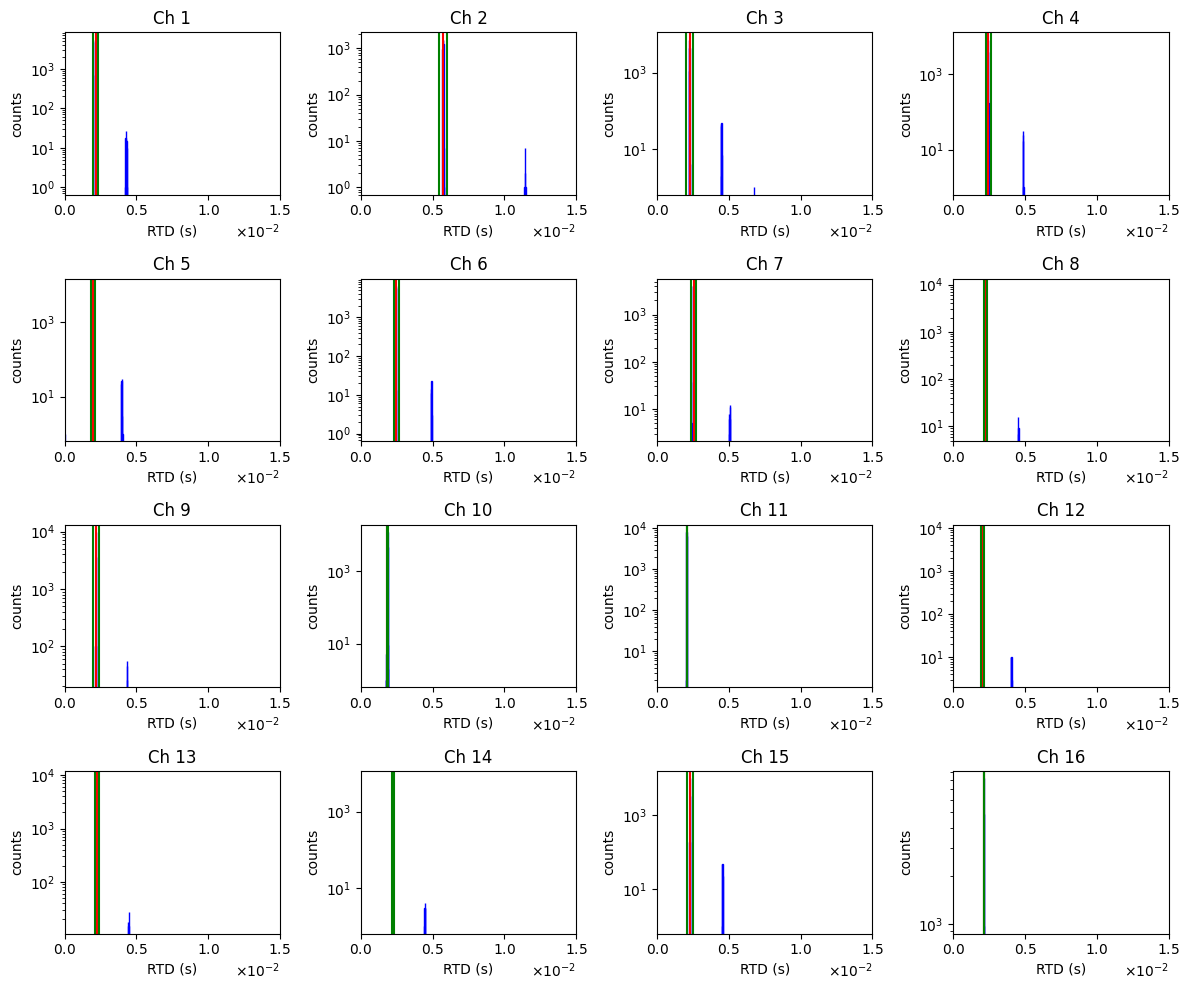

In [3]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 10))

j=1

mean_charge = [] # To store the mean charge per reset for each channel
std_charge = [] # To store the standard deviation for the mean charge per reset for each channel

# Iterate through each time data array and plot the time differences
for i in range(len(timestamps_list)):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # Calculate time differences between adjacent data points
    rtd = np.diff(timestamps_list[i])

    # Set lower and upper cutoffs for the data
    lower_cutoff = 5e-5  # Example lower cutoff
    upper_cutoff = 30e-3  # Example upper cutoff

# Apply conditional filtering to keep only the data within the desired range
    filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff)]
    #print(filtered_rtd[:100]*1000) #ms

    mean_rtd = np.mean(filtered_rtd)
    std_rtd = np.std(filtered_rtd)

#Calcuate the mean charge per reset for each channel
    input_current = 5000 #pA
    mean_Q = mean_rtd * input_current # The charge is in pC since rtd is in s and current is in pA
    std_Q = std_rtd * input_current

    mean_charge.append(mean_Q)
    std_charge.append(std_Q)

    print("ch", j, " ,mean rtd: ",  mean_rtd*1000, " ,std rtd: ", std_rtd*1000)
    print("ch", j, " ,mean charge: ",  mean_Q, " ,std charge: ", std_Q)
    j = j+1



# Create a histogram of the filtered differences

    # Create a histogram of time differences
    ax.hist(filtered_rtd, bins=1000,range=(0, 0.02), color='blue', alpha=1, edgecolor='blue')
    ax.axvline(mean_rtd, color = 'red')
    ax.axvline(mean_rtd-std_rtd , color = 'green')
    ax.axvline(mean_rtd+std_rtd, color = 'green')
    
    # Configure the x-axis formatter to use scientific notation
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))  # Apply scientific notation

     # Add titles (labels) to x and y axes
    ax.set_xlabel('RTD (s)')  # Replace with your desired x-axis label
    ax.set_ylabel('counts')  # Replace with your desired y-axis label

    # Define your desired x-axis range
    x_min = 0 # Replace with your desired minimum x-axis value
    x_max = 15e-3  # Replace with your desired maximum x-axis value

     # Set the x-axis range
    ax.set_xlim(x_min, x_max)
    ax.set_yscale('log')
    ax.set_title(f'Ch {i + 1}')

plt.tight_layout()
plt.show()

In [4]:
#Change the mean charge per reset and the std for ch2 to be the avg. value of the rest of the channels
mean_charge[1] = 10.12 #pC
std_charge[1] = 0.05 #
print(mean_charge)
#print(std_charge)

[10.781642397428467, 10.12, 11.300158421917185, 12.204064364650781, 9.99038411420983, 12.345702890902933, 12.687779572009312, 11.301945552488542, 10.966609181509416, 9.270935446765147, 10.292889316920633, 10.113196670680582, 11.1785051573399, 11.120305814467272, 11.465562799705092, 10.668805424995686]


In [52]:
data_frames_1 = [] #store original data from Nora
data_frames_2 = [] #store csv data with updated area and no min pid cut
data_frames_3 = [] #store csv data with updated area and min pid cut

for i in range(1, 6):
    file_name1 = f"/home/wwz/saq_analysis/calibration/E_scan/originalData/EScan_{i}.csv"
    file_name2 = f"/home/wwz/saq_analysis/calibration/E_scan/UpdatedAreaData_noCut/E_Scan_{i}.csv"
    file_name3 = f"/home/wwz/saq_analysis/calibration/E_scan/UpdatedAreaData_withCut/05_22_2023_EScan_{i}.csv"
    df1 = pd.read_csv(file_name1, delimiter=",", skiprows={1, 15, 16}) # skip channels 1, 15 and 16
    df2 = pd.read_csv(file_name2, delimiter=",", skiprows={1, 15, 16}) # skip channels 1, 15 and 16
    df3 = pd.read_csv(file_name3, delimiter=",", skiprows={1, 15, 16}) # skip channels 1, 15 and 16
    data_frames_1.append(df1)
    data_frames_2.append(df2)
    data_frames_3.append(df3)
    print(file_name2)
#print(data_frames_2)

/home/wwz/saq_analysis/calibration/E_scan/UpdatedAreaData_noCut/E_Scan_1.csv
/home/wwz/saq_analysis/calibration/E_scan/UpdatedAreaData_noCut/E_Scan_2.csv
/home/wwz/saq_analysis/calibration/E_scan/UpdatedAreaData_noCut/E_Scan_3.csv
/home/wwz/saq_analysis/calibration/E_scan/UpdatedAreaData_noCut/E_Scan_4.csv
/home/wwz/saq_analysis/calibration/E_scan/UpdatedAreaData_noCut/E_Scan_5.csv


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


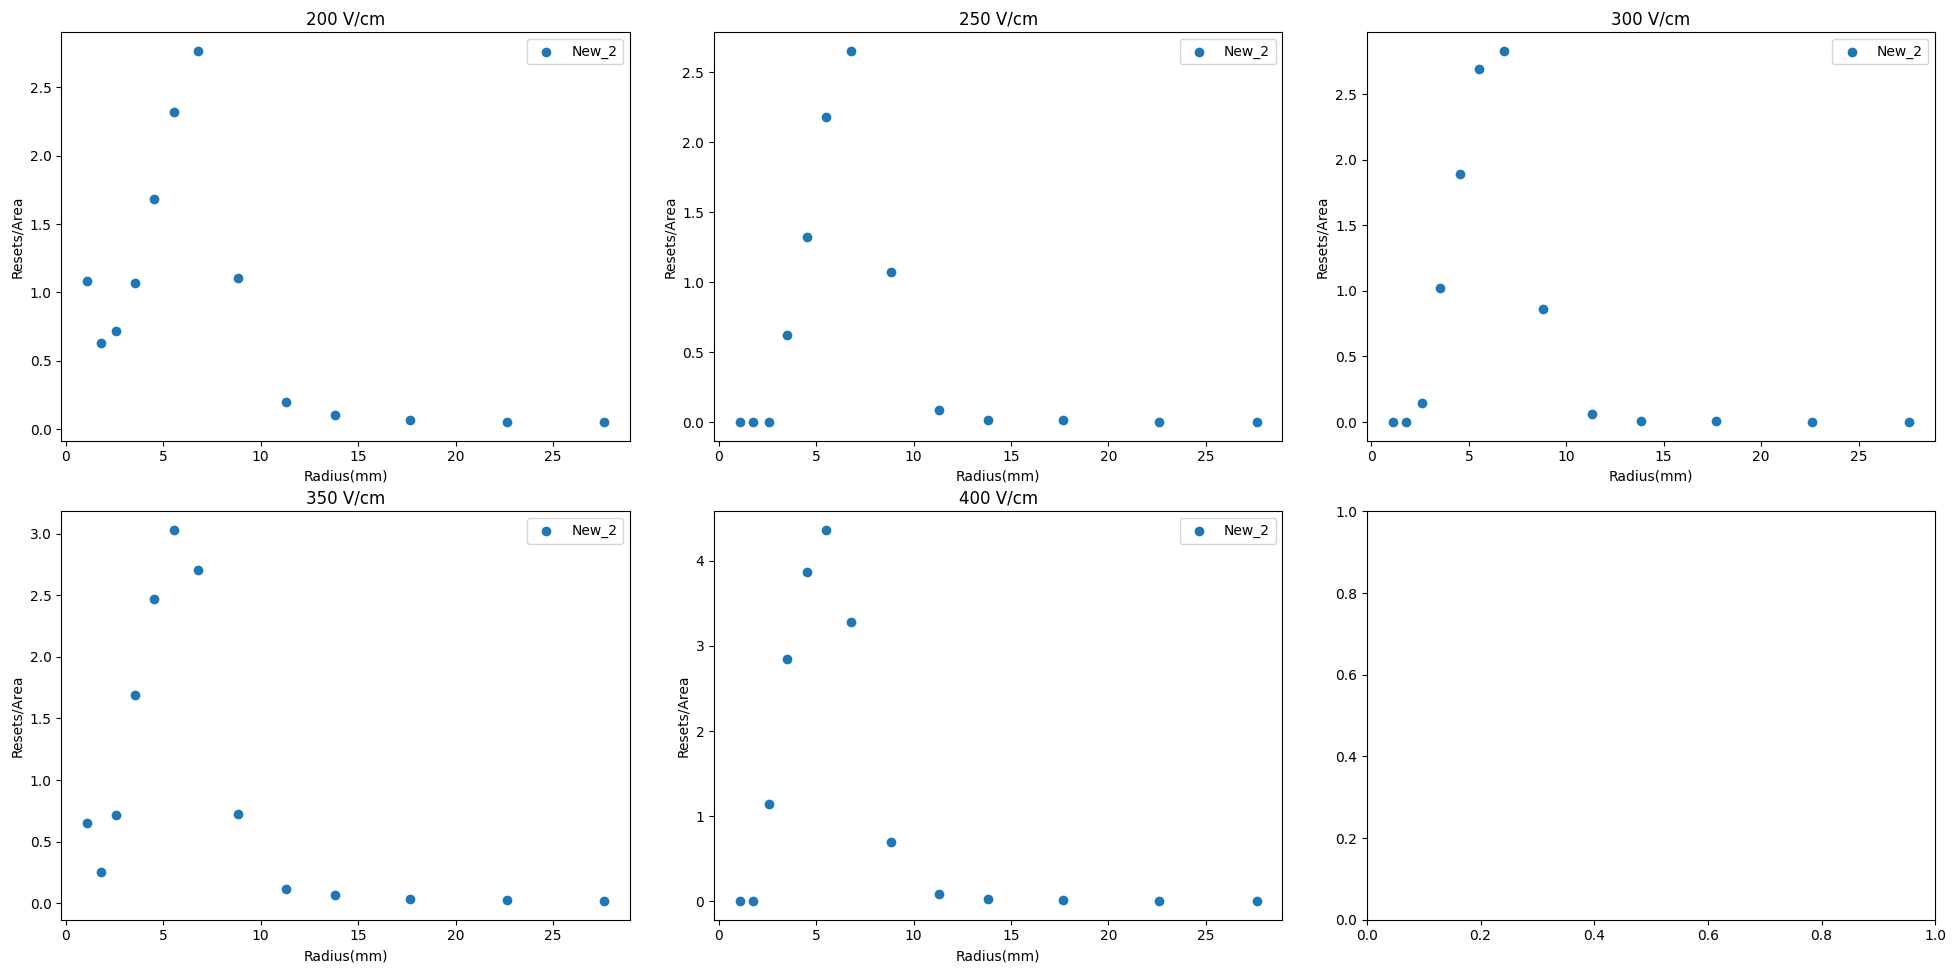

In [44]:
#####################################################################################
# Resets/Area vs. Radius for comparison between:                                    #
# 1. original data from Nora                                                        #
# 2. new csv data with updated area of each channel and including the min pid reset #
# 3. new csv data with updated area of each channel and excluding the min pid reset #
######################################################################################
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.tight_layout(pad=3.0)

E_field = [200, 250, 300, 350, 400]

for i, (df1, field) in enumerate(zip(data_frames_1, E_field)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    ax.scatter(saq.radius_of_channel[1:-2], df1.iloc[:, 1], label= 'Original')
    ax.set_xlabel('Radius(mm)')

    ax.set_ylabel('Resets/Area')
    ax.set_title(f'{field} V/cm')
    #ax.set_ylim(0, 8)


for i, (df2, field) in enumerate(zip(data_frames_2, E_field)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    ax.scatter(saq.radius_of_channel[1:-2], df2.iloc[:, 1], label= 'New_1') # Updated area without min. pid cut
    ax.legend()

for i, (df3, field) in enumerate(zip(data_frames_3, E_field)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    ax.scatter(saq.radius_of_channel[1:-2], df3.iloc[:, 1], label= 'New_2') # Updated area with min. pid cut
    ax.legend()

[0.05, 1.1779932263191297, 0.9356586523409002, 0.7381249691212597, 0.7993721648556699, 0.7432066750485673, 0.557924151577507, 1.041872504456288, 0.034234360386339806, 0.032909640076260044, 0.4780174657457999, 0.7538384836646888, 0.32416305727358025]


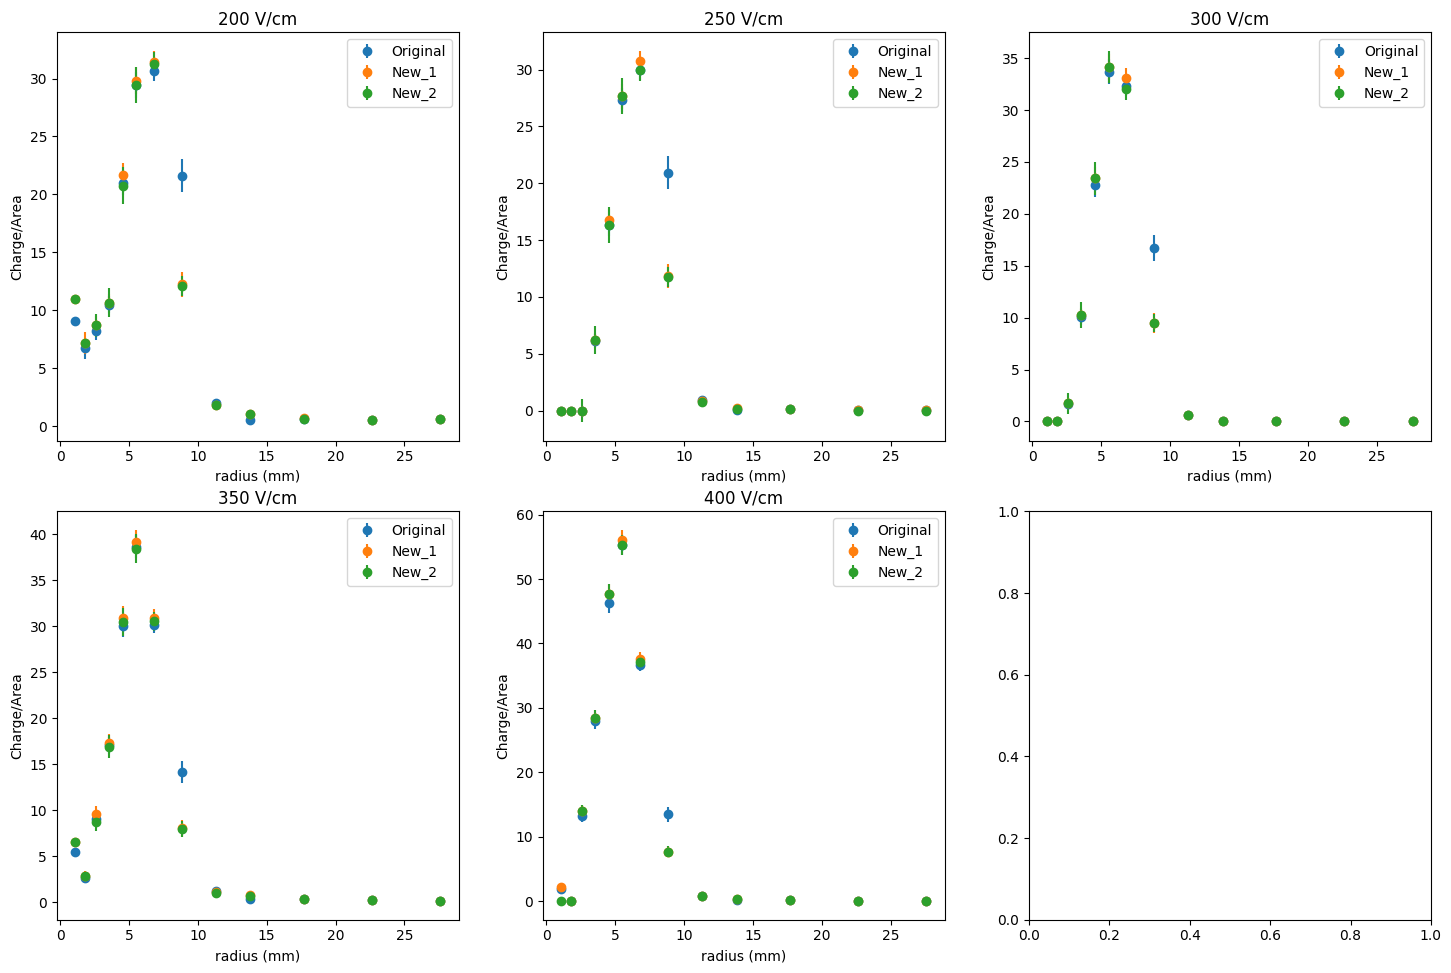

In [36]:
##################################################################################
## Covert the resets/area in the cell above into Charge/Area with errors  ########
##################################################################################

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=3.0)

E_field = [200, 250, 300, 350, 400]
x_ch = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

#Remove ch1, ch15 and ch16 from the mean_charge and std_charge
reduced_mean_charge = mean_charge[1:14]
reduced_std_charge = std_charge[1:14]
print(reduced_std_charge)

for i, (df1, field) in enumerate(zip(data_frames_1, E_field)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    ax.errorbar(saq.radius_of_channel[1:-2], df1.iloc[:, 1]*reduced_mean_charge, yerr=df1.iloc[:, 1]**(0.5)*reduced_std_charge, fmt='o', label= 'Original') # charge/area vs. radius with errors

    ax.set_xlabel('radius (mm)')
    ax.set_ylabel('Charge/Area')
    ax.set_title(f'{field} V/cm')

for i, (df2, field) in enumerate(zip(data_frames_2, E_field)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    ax.errorbar(saq.radius_of_channel[1:-2], df2.iloc[:, 1]*reduced_mean_charge, yerr=df2.iloc[:, 1]**(0.5)*reduced_std_charge, fmt='o', label= 'New_1') # charge/area vs. radius with errors
    #ax.errorbar(x_ch, df2.iloc[:, 1]*reduced_mean_charge, yerr=df2.iloc[:, 1]**(0.5)*reduced_std_charge, fmt='o', label= 'All, updated area') # charge/area vs. radius with errors

for i, (df3, field) in enumerate(zip(data_frames_3, E_field)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    ax.errorbar(saq.radius_of_channel[1:-2], df3.iloc[:, 1]*reduced_mean_charge, yerr=df2.iloc[:, 1]**(0.5)*reduced_std_charge, fmt='o', label= 'New_2') # charge/area vs. radius with errors
    ax.legend()

In [8]:
print(saq.radius_of_channel)
print(saq.area)

[ 0.47376154  1.08855317  1.78272712  2.58085228  3.53032477  4.52659149
  5.52812179  6.78769423  8.82738345 11.31492477 13.81784241 17.68517098
 22.61571865 27.61034335 35.35336763 45.30267516]
[1.41026094e+00 4.62472598e+00 7.89871791e+00 1.39836216e+01
 2.24738983e+01 2.79602092e+01 3.53120952e+01 6.21568379e+01
 1.37962020e+02 1.76855874e+02 2.18389447e+02 5.47106749e+02
 7.01396462e+02 8.74805478e+02 2.18843298e+03 2.85364588e+03]


In [29]:
#Use the function glob() in the glob libary to obtain a list of paths matching a pathname pattern and use sorted() to sort them
root_file_paths = sorted(glob.glob('/home/wwz/saq_analysis/calibration/E_scan/*.root'))
#sorted(root_file_paths)
print(root_file_paths)

['/home/wwz/saq_analysis/calibration/E_scan/05_22_2023_09_47_10.root', '/home/wwz/saq_analysis/calibration/E_scan/05_22_2023_10_35_16.root', '/home/wwz/saq_analysis/calibration/E_scan/05_22_2023_11_21_34.root', '/home/wwz/saq_analysis/calibration/E_scan/05_22_2023_12_07_46.root', '/home/wwz/saq_analysis/calibration/E_scan/05_22_2023_12_59_31.root']


/home/wwz/saq_analysis/calibration/E_scan/05_22_2023_09_47_10.root
[8, 5, 5, 10, 24, 47, 82, 172, 152, 35, 22, 36, 36, 48, 0, 0]
[[1.00000000e+00 5.67270904e+00 8.00000000e+00]
 [2.00000000e+00 1.08114514e+00 5.00000000e+00]
 [3.00000000e+00 6.33014124e-01 5.00000000e+00]
 [4.00000000e+00 7.15122326e-01 1.00000000e+01]
 [5.00000000e+00 1.06790552e+00 2.40000000e+01]
 [6.00000000e+00 1.68096024e+00 4.70000000e+01]
 [7.00000000e+00 2.32215051e+00 8.20000000e+01]
 [8.00000000e+00 2.76719353e+00 1.72000000e+02]
 [9.00000000e+00 1.10175249e+00 1.52000000e+02]
 [1.00000000e+01 1.97901259e-01 3.50000000e+01]
 [1.10000000e+01 1.00737468e-01 2.20000000e+01]
 [1.20000000e+01 6.58006871e-02 3.60000000e+01]
 [1.30000000e+01 5.13261785e-02 3.60000000e+01]
 [1.40000000e+01 5.48693409e-02 4.80000000e+01]
 [1.50000000e+01 0.00000000e+00 0.00000000e+00]
 [1.60000000e+01 0.00000000e+00 0.00000000e+00]]
/home/wwz/saq_analysis/calibration/E_scan/05_22_2023_10_35_16.root
[0, 0, 0, 0, 14, 37, 77, 165, 148, 

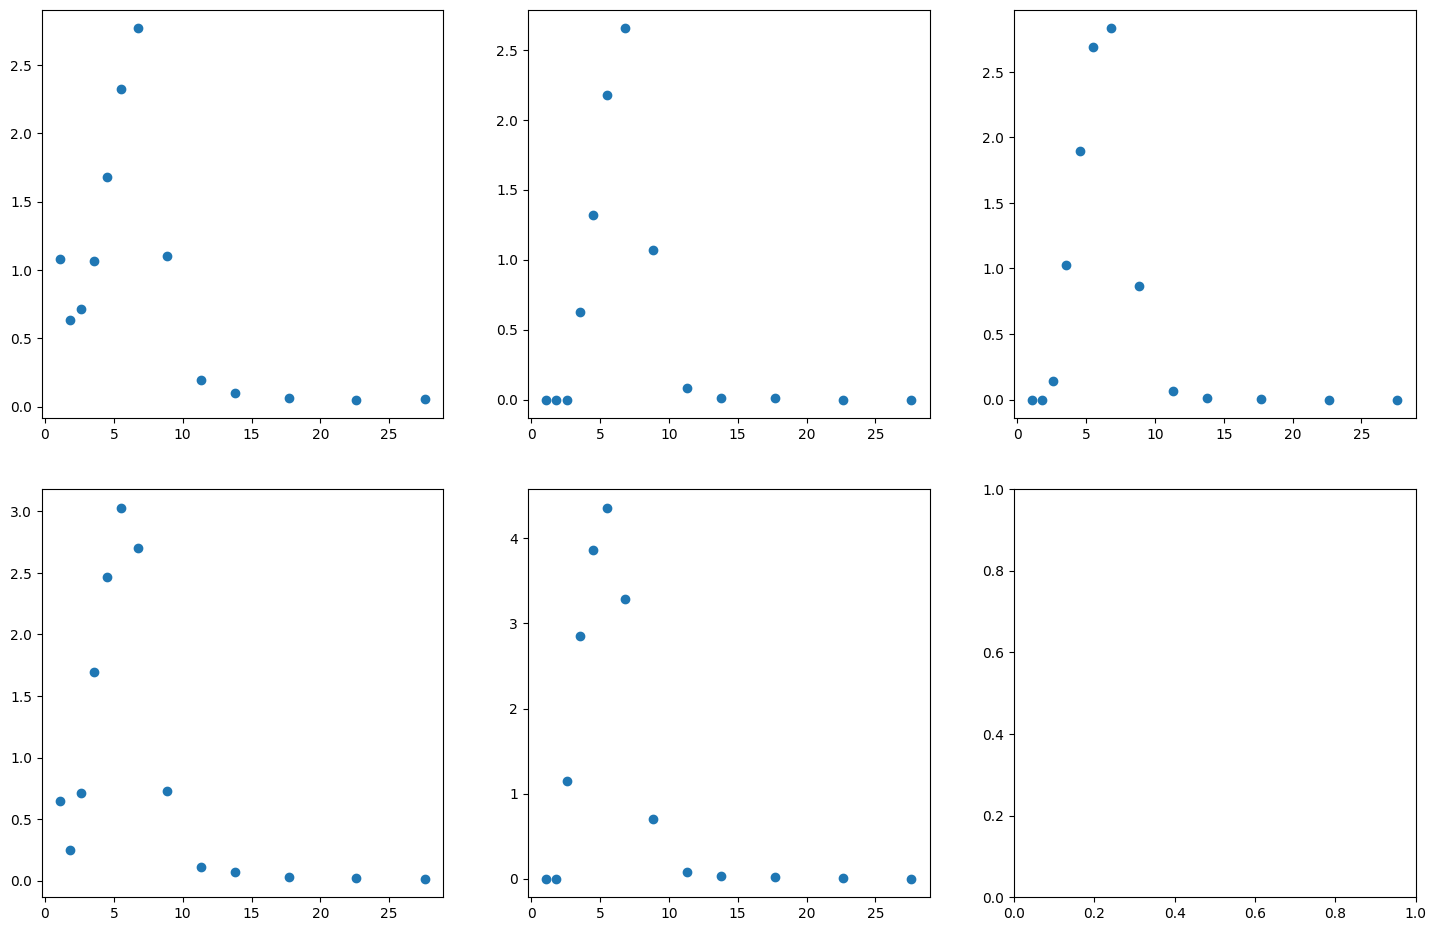

In [48]:

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=3.0)

save_data = np.zeros((saq.N_SAQ_CHANNELS, 3))
save_data[:,0] = np.arange(saq.N_SAQ_CHANNELS)+1  # channel numbers 1-16
    
# Iterate through each root file
for k, root_file_path in enumerate(root_file_paths):
    #root_file_path = '/home/wwz/saq_analysis/calibration/05_19_2023_15_45_23.root'
    file = uproot.open(root_file_path)
    print(root_file_path)

    # Access the tree from the ROOT file
    tree = file["tt"]  # 'tt' is the name of the data tree in the root file

    # Convert the tree data into a dictionary
    data = tree.arrays(library="np")
    # Get timestamps from the data
    timestamps = data["Timestamp"]
    mask = data["ChMask"]
    pid = data["pid"]
    #print(pid[:10])
    #print(len(pid))
    #print(len(mask))
    filtered_pid = [pid[i] for i in range(len(timestamps)) if pid[i] != min(pid)]
    filtered_mask = [mask[i] for i in range(len(timestamps)) if mask[i] !=0 and pid[i] != min(pid)]

    #print(len(filtered_pid))
    #print(len(filtered_mask))
    
    ch_resets = [] # store all resets for all channels
    
    for i in range(len(filtered_mask)):
        #print(saq.channels_in_reset_mask(filtered_mask[i]))
        for j in range(len(saq.channels_in_reset_mask(filtered_mask[i]))):
            ch_resets.append(saq.channels_in_reset_mask(filtered_mask[i])[j])
    
    #print(ch_resets)
    
    # Initializing reset counts for 16 channels 
    ch = [0] * 16 #ch_single[i] stores the number of single-channel resets in channel i. 
    
    for num in ch_resets:
        ch[num] += 1
    print (ch)

    row = k // 3
    col = k % 3
    ax = axes[row, col]
    
    ax.scatter(saq.radius_of_channel[1:-2], ch[1:-2]/saq.area[1:-2]) # charge/area vs. radius with errors
    
    save_data[:, 1] = ch/saq.area
    save_data[:, 2] = ch

    print(save_data)

    #Save data into a csv file
    header = ["SAQ_Channel_Numbers", "Resets_Averaged_by_Area", "Raw_Number_of_Resets"]
    outfile = root_file_path.replace('.root', '_data.csv')
    #outfile = f'/home/wwz/saq_analysis/calibration/E_scan/05_22_2023_EScan_{E_field[k]}_Vpercm.csv'
    with open(outfile, 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        # write the header
        writer.writerow(header)
        # write multiple rows
        writer.writerows(save_data)
    




  